# 调用高德Web服务API文档内容

- 完成每一个模块中的一个子功能的API调用

In [1]:
import pandas as pd
import requests
key ="1e5c689bf8116c26d84bb5779b377912"

## 地理/逆地理编码

- 获取地理编码

In [2]:
# A-1 地理编码
def geocode(address,city=None,batch=None,sig=None)->dict:
    """获取地理编码"""
    url = 'https://restapi.amap.com/v3/geocode/geo?parameters'
    params={
        'key': key,
        'address':address,
        'city':city,
        'batch':batch,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
深大 = geocode(address='深圳大学')
print(深大)
df_深大地理编码 = pd.json_normalize(深大['geocodes'])
display(df_深大地理编码)
深大地理编码 = 深大['geocodes'][0]['location']
print("深大地理编码:",深大地理编码)

{'status': '1', 'info': 'OK', 'infocode': '10000', 'count': '1', 'geocodes': [{'formatted_address': '广东省深圳市南山区深圳大学', 'country': '中国', 'province': '广东省', 'citycode': '0755', 'city': '深圳市', 'district': '南山区', 'township': [], 'neighborhood': {'name': [], 'type': []}, 'building': {'name': [], 'type': []}, 'adcode': '440305', 'street': [], 'number': [], 'location': '113.935097,22.527939', 'level': '兴趣点'}]}


,formatted_address,country,province,citycode,city,district,township,adcode,street,number,location,level,neighborhood.name,neighborhood.type,building.name,building.type
0,广东省深圳市南山区深圳大学,中国,广东省,0755,深圳市,南山区,[],440305,[],[],"113.935097,22.527939",兴趣点,[],[],[],[]


深大地理编码: 113.935097,22.527939


- 逆地理编码

In [3]:
# A-2 基础逆地理编码分析
def regeocode(location,poitype=None,radius=None,extensions="base",batch=False,roadlevel=None,sig=None,homeorcorp=None)->dict:
    """获取逆地理编码"""
    url = 'https://restapi.amap.com/v3/geocode/regeo?parameters'
    params={
        'key': key,
        'location':location,
        'poitype':poitype,
        'radius':radius,
        'extensions':extensions,
        'batch':batch,
        'roadlevel':roadlevel,
        'homeorcorp':homeorcorp,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

深大逆地理编码_base = regeocode(深大地理编码)
print(深大逆地理编码_base)
df_深大逆地理编码 = pd.json_normalize(深大逆地理编码_base).T
display(df_深大逆地理编码)

{'status': '1', 'regeocode': {'addressComponent': {'city': '深圳市', 'province': '广东省', 'adcode': '440305', 'district': '南山区', 'towncode': '440305007000', 'streetNumber': {'number': '118号', 'location': '113.93476,22.5263861', 'direction': '南', 'distance': '176.103', 'street': '后海大道'}, 'country': '中国', 'township': '粤海街道', 'businessAreas': [{'location': '113.943834,22.545057', 'name': '科技园', 'id': '440305'}, {'location': '113.926287,22.519559', 'name': '南油', 'id': '440305'}], 'building': {'name': [], 'type': []}, 'neighborhood': {'name': [], 'type': []}, 'citycode': '0755'}, 'formatted_address': '广东省深圳市南山区粤海街道深大东路深圳大学粤海校区'}, 'info': 'OK', 'infocode': '10000'}


,0
status,1
info,OK
infocode,10000
regeocode.addressComponent.city,深圳市
regeocode.addressComponent.province,广东省
regeocode.addressComponent.adcode,440305
regeocode.addressComponent.district,南山区
regeocode.addressComponent.towncode,440305007000
regeocode.addressComponent.streetNumber.number,118号
regeocode.addressComponent.streetNumber.location,"113.93476,22.5263861"


In [4]:
深大逆地理编码_all = regeocode(深大地理编码,extensions="all")
print(深大逆地理编码_all)
df_深大逆地理编码_all = pd.json_normalize(深大逆地理编码_all)
display(df_深大逆地理编码_all)

{'status': '1', 'regeocode': {'roads': [{'id': '0755F49F0180487453', 'location': '113.935,22.5281', 'direction': '南', 'name': '深大东路', 'distance': '15.6026'}, {'id': '0755F49F018048122', 'location': '113.936,22.5272', 'direction': '西北', 'name': '后海大道', 'distance': '143.373'}, {'id': '0755F49F01804813806', 'location': '113.932,22.5291', 'direction': '东南', 'name': '深大西路', 'distance': '309.243'}], 'roadinters': [{'second_name': '高新南十道', 'first_id': '0755F49F018048122', 'second_id': '0755F49F018048258', 'location': '113.9351222,22.52504139', 'distance': '322.212', 'first_name': '后海大道', 'direction': '北'}], 'formatted_address': '广东省深圳市南山区粤海街道深大东路深圳大学粤海校区', 'addressComponent': {'city': '深圳市', 'province': '广东省', 'adcode': '440305', 'district': '南山区', 'towncode': '440305007000', 'streetNumber': {'number': '118号', 'location': '113.93476,22.5263861', 'direction': '南', 'distance': '176.103', 'street': '后海大道'}, 'country': '中国', 'township': '粤海街道', 'businessAreas': [{'location': '113.943834,22.545057

,status,info,infocode,regeocode.roads,regeocode.roadinters,regeocode.formatted_address,regeocode.addressComponent.city,regeocode.addressComponent.province,regeocode.addressComponent.adcode,regeocode.addressComponent.district,...,regeocode.addressComponent.country,regeocode.addressComponent.township,regeocode.addressComponent.businessAreas,regeocode.addressComponent.building.name,regeocode.addressComponent.building.type,regeocode.addressComponent.neighborhood.name,regeocode.addressComponent.neighborhood.type,regeocode.addressComponent.citycode,regeocode.aois,regeocode.pois
0,1,OK,10000,"[{'id': '0755F49F0180487453', 'location': '113...","[{'second_name': '高新南十道', 'first_id': '0755F49...",广东省深圳市南山区粤海街道深大东路深圳大学粤海校区,深圳市,广东省,440305,南山区,...,中国,粤海街道,"[{'location': '113.943834,22.545057', 'name': ...",[],[],[],[],0755,"[{'area': '1166700.931114', 'type': '141201', ...","[{'id': 'B02F38OXWG', 'direction': '东北', 'busi..."


### 思考

- 地理编码将数据移植到空间坐标系中，然后通过定位，讲范围内所有的地理标志都标志出来。精准，我认为具有ML,AI功能。

---
## 路径规划（步行）

In [7]:
def walking(origin,destination,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/direction/walking?parameters'
    params={
        'key':key,
        'origin':origin,
        'destination':destination,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
来福士 = geocode('广东省深圳市南山区来福士')
来福士_location = 来福士['geocodes'][0]['location']
深大_location = 深大['geocodes'][0]['location']
print("(起点)深大_location:",深大_location,"(终点)来福士_location:",来福士_location)

(起点)深大_location: 113.935097,22.527939 (终点)来福士_location: 113.926697,22.514109


In [8]:
深大_来福士 = walking(深大_location,来福士_location)
df_步行路径规划 = pd.json_normalize(深大_来福士["route"]["paths"][0]['steps'])
display(df_步行路径规划)
df_步行路径规划["instruction"]

,instruction,orientation,road,distance,duration,polyline,action,assistant_action,walk_type
0,向西步行544米左转,西,[],544,435,"113.935061,22.528069;113.934701,22.527995;113....",左转,[],0
1,向南步行60米右转,南,[],60,48,"113.929839,22.527687;113.929787,22.527517;113....",右转,[],0
2,步行134米右转,[],[],134,107,"113.929709,22.52714;113.929462,22.527192;113.9...",右转,[],4
3,沿学府路向西步行99米左转,西,学府路,99,79,"113.929023,22.526628;113.92895,22.526593;113.9...",左转,[],0
4,沿南光路向南步行355米右转,南,南光路,355,284,"113.928077,22.526736;113.928077,22.526688;113....",右转,[],0
5,步行129米右转,[],[],129,103,"113.927739,22.523503;113.9276,22.523559;113.92...",右转,[],4
6,沿南光路向南步行681米左转,南,南光路,681,545,"113.927587,22.522552;113.927548,22.522287;113....",左转,[],0
7,沿海康街向东南步行107米右转,东南,海康街,107,86,"113.925252,22.516901;113.925603,22.516658;113....",右转,[],0
8,向西南步行63米左转,西南,[],63,50,"113.926076,22.516306;113.925799,22.515929;113....",左转,[],0
9,向东南步行89米右转,东南,[],89,71,"113.925725,22.515833;113.925842,22.515781;113....",右转,[],0


0            向西步行544米左转
1             向南步行60米右转
2              步行134米右转
3         沿学府路向西步行99米左转
4        沿南光路向南步行355米右转
5              步行129米右转
6        沿南光路向南步行681米左转
7       沿海康街向东南步行107米右转
8            向西南步行63米左转
9            向东南步行89米右转
10             步行194米右转
11    沿南海大道向南步行13米到达目的地
Name: instruction, dtype: object

### 思考

- 我认为路径规划具有ML、AI的功能。并且有最佳路程推荐

---
## 行政区域查询

In [9]:
def district(keywords,subdistrict=None,page=None,offset=None,extensions='base',filter=None,)->dict:
    url = 'https://restapi.amap.com/v3/config/district?parameters'
    params={
        'key':key,
        'keywords':keywords,
        'subdistrict':subdistrict,
        'page':page,
        'offset':offset,
        'extensions':extensions,
        'filter':filter,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
行政区域 = district(keywords='江西',extensions='all',subdistrict=3)

df_行政区域_1级 = pd.json_normalize(行政区域["districts"][0]['districts'])

df_行政区域_2级_上饶市 = pd.json_normalize(行政区域["districts"][0]['districts'][10]['districts'])
display(df_行政区域_1级,df_行政区域_2级_上饶市)

,citycode,adcode,name,center,level,districts
0,0790,360500,新余市,"114.930835,27.810834",city,"[{'citycode': '0790', 'adcode': '360521', 'nam..."
1,0794,361000,抚州市,"116.358351,27.98385",city,"[{'citycode': '0794', 'adcode': '361024', 'nam..."
2,0792,360400,九江市,"115.992811,29.712034",city,"[{'citycode': '0792', 'adcode': '360429', 'nam..."
3,0701,360600,鹰潭市,"117.033838,28.238638",city,"[{'citycode': '0701', 'adcode': '360603', 'nam..."
4,0797,360700,赣州市,"114.940278,25.85097",city,"[{'citycode': '0797', 'adcode': '360728', 'nam..."
5,0791,360100,南昌市,"115.892151,28.676493",city,"[{'citycode': '0791', 'adcode': '360123', 'nam..."
6,0795,360900,宜春市,"114.391136,27.8043",city,"[{'citycode': '0795', 'adcode': '360925', 'nam..."
7,0796,360800,吉安市,"114.986373,27.111699",city,"[{'citycode': '0796', 'adcode': '360825', 'nam..."
8,0798,360200,景德镇市,"117.214664,29.29256",city,"[{'citycode': '0798', 'adcode': '360203', 'nam..."
9,0793,361100,上饶市,"117.971185,28.44442",city,"[{'citycode': '0793', 'adcode': '361130', 'nam..."


,citycode,adcode,name,center,level,districts
0,0799,360302,安源区,"113.855044,27.625826",district,"[{'citycode': '0799', 'adcode': '360302', 'nam..."
1,0799,360322,上栗县,"113.800525,27.877041",district,"[{'citycode': '0799', 'adcode': '360322', 'nam..."
2,0799,360321,莲花县,"113.955582,27.127807",district,"[{'citycode': '0799', 'adcode': '360321', 'nam..."
3,0799,360323,芦溪县,"114.041206,27.633633",district,"[{'citycode': '0799', 'adcode': '360323', 'nam..."
4,0799,360313,湘东区,"113.7456,27.639319",district,"[{'citycode': '0799', 'adcode': '360313', 'nam..."


### 思考

- 行政区域查询在高德API文档中有被提到两种使用方法：（一）通过下载相应的文档进行查找；（二）通过插件DistrictSearch进行搜索查询。值都是查询数据库所得，所有不具备ML、AI的功能的。

---
## 搜索POI

- 关键字搜素

In [10]:
def place_text(keywords,types,city=None,citylimit=None,children=None,page=None,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/place/text?parameters'
    params={
        'key':key,
        'keywords':keywords,
        'types':types,
        'city':city,
        'citylimit':citylimit,
        'children':children,
        'page':page,
        'extensions':extensions,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

深圳_大学 = place_text('大学','高等院校',city="深圳市",children=1,extensions='all')
深圳_大学

{'status': '1',
 'count': '49',
 'info': 'OK',
 'infocode': '10000',
 'suggestion': {'keywords': [], 'cities': []},
 'pois': [{'id': 'B0FFI9P7G8',
   'parent': [],
   'childtype': [],
   'name': '深圳职业技术学院(东区)',
   'tag': [],
   'type': '科教文化服务;学校;高等院校',
   'typecode': '141201',
   'biz_type': [],
   'address': '西丽街道新围社区沙河西路4089号',
   'location': '113.947812,22.591970',
   'tel': '0755-26731352',
   'postcode': '518055',
   'website': [],
   'email': [],
   'pcode': '440000',
   'pname': '广东省',
   'citycode': '0755',
   'cityname': '深圳市',
   'adcode': '440305',
   'adname': '南山区',
   'importance': [],
   'shopid': [],
   'shopinfo': '0',
   'poiweight': [],
   'gridcode': '3313771502',
   'distance': [],
   'navi_poiid': 'F49F017048_65376',
   'entr_location': '113.9544,22.587789',
   'business_area': [],
   'exit_location': [],
   'match': '0',
   'recommend': '0',
   'timestamp': '2020-04-07 15:24:09',
   'alias': [],
   'indoor_map': '0',
   'indoor_data': {'cpid': [], 'floor': [], '

In [11]:
df_深圳_大学 = pd.json_normalize(深圳_大学["pois"])
df_深圳_大学_深圳大学 = pd.json_normalize(深圳_大学["pois"][7]["children"])
display(df_深圳_大学,df_深圳_大学_深圳大学)

,id,parent,childtype,name,tag,type,typecode,biz_type,address,location,...,discount_num,event,children,photos,indoor_data.cpid,indoor_data.floor,indoor_data.truefloor,indoor_data.cmsid,biz_ext.rating,biz_ext.cost
0,B0FFI9P7G8,[],[],深圳职业技术学院(东区),[],科教文化服务;学校;高等院校,141201,[],西丽街道新围社区沙河西路4089号,"113.947812,22.591970",...,0,[],"[{'id': ' B02F37VJPR ', 'name': ' 深圳职业技术学院东区(西...","[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],5.0,[]
1,B02F37UIGT,B0FFK135CJ,309,深圳大学粤海校区,[],科教文化服务;学校;高等院校,141201,[],南海大道3688号,"113.936683,22.532681",...,0,[],"[{'id': ' B0FFF3XB7T ', 'name': ' 深圳大学粤海校区(立德门...","[{'title': '外景图', 'url': 'http://store.is.auto...",[],[],[],[],[],[]
2,B02F38J6V9,[],[],南方科技大学,[],科教文化服务;学校;高等院校,141201,[],西丽大学城学苑大道1088号(塘朗站),"113.999887,22.598886",...,0,[],"[{'id': ' B02F38JFR0 ', 'name': ' 南方科技大学(正门) '...","[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],[],[]
3,B02F38JF39,[],[],深圳信息职业技术学院,[],科教文化服务;学校;高等院校,141201,[],龙翔大道2188号(近体育新城),"114.215574,22.684209",...,0,[],"[{'id': ' B02F38JELR ', 'name': ' 深圳信息职业技术学院(西...","[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],[],[]
4,B02F37VHEM,[],[],深圳职业技术学院西丽湖校区,[],科教文化服务;学校;高等院校,141201,[],沙河西路4089号,"113.95113,22.588337",...,0,[],"[{'id': ' B02F37VQPY ', 'name': ' 深圳职业技术学院西丽湖校...","[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],[],[]
5,B02F37UGFZ,[],[],深圳职业技术学院华侨城校区,[],科教文化服务;学校;高等院校,141201,[],香蜜湖街道香岭社区职教街3号,"113.999681,22.536615",...,0,[],"[{'id': ' B02F37VY4L ', 'name': ' 深圳职业技术学院华侨城校...","[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],[],[]
6,B0FFHHKZQA,[],[],深圳北理莫斯科大学,[],科教文化服务;学校;高等院校,141201,[],龙岗公众高尔夫球场内,"114.20532,22.679921",...,0,[],[],"[{'title': [], 'url': 'http://aos-cdn-image.am...",[],[],[],[],[],[]
7,B0FFFTROX1,B0FFLIWQP5,309,深圳大学丽湖校区,[],科教文化服务;学校;高等院校,141201,[],桃源街道学苑大道1066号,"113.992764,22.596789",...,0,[],"[{'id': ' B0FFHQR3V1 ', 'name': ' 深圳大学丽湖校区(惟品门...","[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],[],[]
8,B0FFF4H4MQ,[],[],香港中文大学(深圳),[],科教文化服务;学校;高等院校,141201,[],龙翔大道2001号,"114.212776,22.688259",...,0,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],[],[]
9,B02F309V6W,[],[],深圳广播电视大学龙岗分校,[],科教文化服务;学校;高等院校,141201,[],黄阁路160号,"114.219469,22.717279",...,0,[],"[{'id': ' B02F37VHA3 ', 'name': ' 深圳广播电视大学龙岗分校...","[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],[],[]


,id,name,sname,location,address,distance,subtype,typecode
0,B0FFHQR3V1,深圳大学丽湖校区(惟品门),惟品门,"113.989231,22.597147",国家超级计算深圳中心旁边,0,门,991400
1,B0FFI4WZXJ,深圳大学丽湖校区(惟艺门),惟艺门,"113.995082,22.596052",,0,门,991400


### 思考

- 搜索POL包括关键字搜索、周边搜索、多边形搜索、ID查询四种筛选机制，我认为它背后是含有ML、AI的功能的。

---
## IP定位

In [12]:
def ip(ip:str):
    params= {
        'key':key,
        'ip':ip,
        'output':'json'
    }
    response = requests.get("https://restapi.amap.com/v3/ip?parameters", params)
    data = response.json()
    del data['status']
    del data['info']
    df = ["省份: %s"%(data['province']),"地区: %s"%(data['city']),"地理编码: %s"%(data['adcode']),"经纬度: %s"%(data['rectangle']),]
    print("ip:"+ip)
    for i in df:
        print(i)
    return

ip("210.21.79.245")

ip:210.21.79.245
省份: 广东省
地区: 广州市
地理编码: 440100
经纬度: 113.1017375,22.93212254;113.6770499,23.3809537


### 思考

- 因为IP地址API提供给用户单向的ip搜索功能，所以我认为它不具备ML、AI的功能。

---
## 静态地图

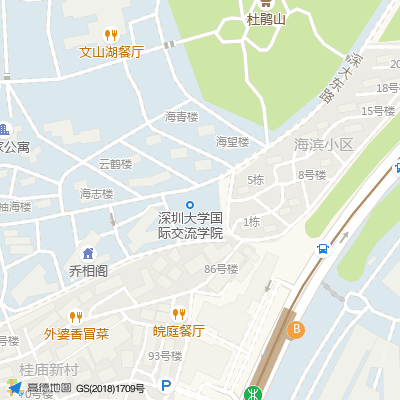

In [13]:
from PIL import Image
from io import BytesIO
def staticmap(location,zoom,size=None,scale=1,markers=None,labels=None,paths=None,traffic=0,page=None,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/staticmap?parameters'
    params={
        'key':key,
        'location':location,
        'zoom':zoom,
        'size':size,
        'scale':scale,
        'markers':markers,
        'labels':labels,
        'paths':paths,
        'traffic':traffic,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = Image.open(BytesIO(response.content))
    return data
staticmap(location=深大_location,zoom=16)

### 思考

- 静态地图需要调用用户展示计算机视觉的相关功能，所以我认为它具备ML、AI的功能。

---
## 坐标转换

In [14]:
def assistant(locations:str,coordsys:str):
    params = {
        'key':key,
        'coordsys':coordsys,
        'locations': locations,
        'output':'json'
    }
    response = requests.get("https://restapi.amap.com/v3/assistant/coordinate/convert?parameters", params)
    data = response.json()['locations']
    return data
assistant("110.92499782059477,21.678348812949974|110.931788,21.684118",'gps')

'110.929509548612,21.675566677518;110.936314561632,21.681341688369'

### 思考

- 坐标转换功能需要通过算法计算对比不同平台坐标，所以我认为其背后含有ML、AI的功能。

---
## 天气查询

In [15]:
def weather(city:str):
    params = {
        'key':key,
        'city':city,
        'output':'json'
    }
    response = requests.get("https://restapi.amap.com/v3/weather/weatherInfo?parameters", params)
    data = response.json()
    return data
weather('深圳')

{'status': '1',
 'count': '1',
 'info': 'OK',
 'infocode': '10000',
 'lives': [{'province': '广东',
   'city': '深圳市',
   'adcode': '440300',
   'weather': '晴',
   'temperature': '25',
   'winddirection': '南',
   'windpower': '≤3',
   'humidity': '85',
   'reporttime': '2020-04-20 20:22:36'}]}

### 思考

- 天气查询功能只需要调用查询地天气数据，所以我认为其背后不含有ML、AI的功能。

---
## 输入提示

In [16]:
def inputtips(keywords:str):
    params = {
        'key':key,
        'keywords':keywords,
        'output':'json'
    }
    response = requests.get("https://restapi.amap.com/v3/assistant/inputtips?parameters", params)
    data = response.json()
    return data
inputtips('深圳')

{'status': '1',
 'count': '10',
 'info': 'OK',
 'infocode': '10000',
 'tips': [{'id': 'B02F30A89U',
   'name': '深圳站',
   'district': '广东省深圳市罗湖区',
   'adcode': '440303',
   'location': '114.117751,22.531948',
   'address': '建设路1号',
   'typecode': '150200',
   'city': []},
  {'id': [],
   'name': '深圳市',
   'district': '广东省深圳市',
   'adcode': '440304',
   'location': [],
   'address': '福田区',
   'typecode': '190104',
   'city': []},
  {'id': 'B02F38IPWZ',
   'name': '深圳北站',
   'district': '广东省深圳市龙华区',
   'adcode': '440309',
   'location': '114.0295,22.609875',
   'address': '致远中路28号',
   'typecode': '150200',
   'city': []},
  {'id': 'B02F302519',
   'name': '深圳西站',
   'district': '广东省深圳市南山区',
   'adcode': '440305',
   'location': '113.907276,22.527291',
   'address': '学府路与月亮湾大道交汇处',
   'typecode': '150200',
   'city': []},
  {'id': 'B031D0QANU',
   'name': '深圳',
   'district': '江西省赣州市寻乌县',
   'adcode': '360734',
   'location': '115.539713,24.735923',
   'address': [],
   'typecode': '19010

### 思考

- 天气查询功能只需要调用查询地天气数据，所以我认为其背后不含有ML、AI的功能。

---
## 交通态势

In [17]:
def rectangle(rectangle:str):
    params = {
        'key':key,
        'rectangle':rectangle,
        'output':'json'
    }
    response = requests.get("https://restapi.amap.com/v3/traffic/status/rectangle?parameters", params)
    data = response.json()
    return data
rectangle('116.351147,39.966309;116.357134,39.968727')

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'trafficinfo': {'description': '北三环路：双向畅通。',
  'evaluation': {'expedite': '100.00%',
   'congested': '0.00%',
   'blocked': '0.00%',
   'unknown': '0.00%',
   'status': '1',
   'description': '整体畅通'}}}

### 思考

- 我认为交通态势功能需要将地点坐标通过推荐算法连接后台数据，所以我认为其背后含有ML、AI的功能。

---

# 设计一个简单的应用

应用：一款专门为旅游出行而运行的地图导航。

具备的功能：
- 可以为用户提供路径规划（路径规划API）
- 可以为用户提供一个实时地图（静态地图API）
- 可以根据当地天气变化去推荐不同的路线（天气查询）